

---
 # **Assignment 4 Kaggle Competition**
  
This notebook contains the detailed steps for our submission on the Fashion-MNIST Challenge. 

The work was done by Shahrad EmZed, Emma Tomiuk and Hanna Yurchyk. 

## Step 1: Prepare the data

To complete this assigmnent, we decided to use the Convolutional Neural Network model from TensorFlow Python library.

The shape that Tensorflow takes as input X_train in the format `(<number of images>, <image x_dimension>, <image y_dimension>)`. As Y_tain, it needs a simple array of labels in range [0, 9] corresponding to each image at a specific index. Thus, we transform the data provided [here](https://www.kaggle.com/competitions/mais-202-winter-2022/data) into NumPy arrays of this shape.

Moreover, we normalize the data before training our model to bring our values within a [0,1] range instead of the RGB values [0, 255]. This step significantly increases our training speed and the accuracy of the model.

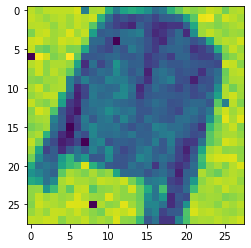

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd

## X_train
# load images
train_images = np.load("train_images.npy") 

# normalize: divide by 255 bc that's the range of colors
x_train = train_images/ 255.0

## Y_train
# load training labels data
y_train = pd.read_csv('train_labels.csv')
y_train = y_train.drop(['ID'], axis=1).to_numpy()
y_train = y_train.reshape(-1, )

# display image (provided function)
def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

# index of the training image you want to display
index = 122 
show_image(train_images[index])

## Step 2: Training
Now that the X_train and Y_train are ready, we can train our CNN model. In this step we have to be careful to choose our hyperparameters to adjust the accuracy. At each convolutional layer we use ReLu to set our values above 0. At the end, we use SoftMax to choose the largest probability for each of the 10 labels.

In [16]:
#train the model
model = models.Sequential([
              #convolutional layers
              layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(28,28,1)), 
              layers.AveragePooling2D((2, 2)), 

              layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'), 
              layers.AveragePooling2D((2, 2)),

              

              #dense layers
              layers.Flatten(),
              
              layers.Dense(512, activation='relu'),
              
              layers.Dense(256, activation='relu'),
              
              layers.Dense(128, activation='relu'), 

              layers.Dropout(0.25), #this layer prevents some overfitting by removing 25% of connections
              # last layer should be num of classes
              layers.Dense(10, activation='softmax') 

              
    ])
  
#compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10) 

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7253 - accuracy: 0.7236
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.5019 - accuracy: 0.8139
Epoch 3/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.4382 - accuracy: 0.8358
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.3952 - accuracy: 0.8546
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.3597 - accuracy: 0.8661
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.3329 - accuracy: 0.8758
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.3116 - accuracy: 0.8835
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.2875 - accuracy: 0.8926
Epoch 9/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.2658 - accuracy: 0.9005
Epoch 10/10
1563/1563 [==============================] - 59s 38m

## Hyperparameters

We heavily used several resources to help us in implementing this model. One of such resources is [here](https://www.datacamp.com/community/tutorials/cnn-tensorflow-python). We payed particular attention to what hyperparameters were used in different implementations of the model and finetuned them later according to the accuracy results on Kaggle. These are the comments justifying our choices in our implementation:

<ol>
  <li>Convolutional layers</il>
    <ul>We noticed that increasing the number of convolutional layers above 2 does not improve the accuracy of our results and significantly descreases our training time.</ul>
  <li>Dropout layer</il>
    <ul>We found that adding a dropout layer, which randomly chooses 25% edges to remove between our two last layers decreased the accuracy slightly when running it here, but improved our score on the leaderboard because it reduces the chances of overfitting our model to the training data by removing a part of it. </ul>
  <li>Filters</il>
    <ul>As a general rule, the filters were increased in powers of 2, starting from 32 and above. We noticed having three layers with 512, 256, and 128 filters gave the best results. </ul>
  <li>Kernel size</il>
    <ul>Since we are dealing with images of size 28x28, the choice between 2x2 and 3x3 filters did not significantly imacted our results. Thus, we decided to keep them at 2x2.</ul>
  <li>Number of layers in the dense neural network</il>
    <ul>Increasing the number of dense layes increased our training time, but yieled more accurate predicitons.</ul>
  <li>epoch</il>
    <ul>Each epoch is a training session that goes over the full data set and uses the previous parameters to improve the model. We noticed that after 10 epochs, the model does not significantly imporve and the results on Kaggle demonstrated some overfitting. This, we kept it at 10.</ul>
</ol>

## Step 3: Predicting
In this step, we predict the labels of the test dataset that we then submit to Kaggle. 


In [17]:
# model testing
x_test = np.load('test_images.npy')
x_test = x_test / 255.0

# predict values
y_pred = model.predict(x_test)
y_labels = np.array([np.argmax(element) for element in y_pred])

# save results to csv
df = pd.DataFrame(range(0, 20000), columns=['ID'])
df['label'] = y_labels
df.to_csv('submission.csv', index=False)
df

,ID,label
0,0,9
1,1,5
2,2,2
3,3,1
4,4,8
...,...,...
19995,19995,0
19996,19996,2
19997,19997,3
19998,19998,8


## Quotes
"i am so lost and i have no idea what to do" one contributor mentioned mentioned.

"lets drop out together thanks!" one contributor mentioned thought.